In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import random
import json
import cv2

총 이미지 개수 :  9193
이미지 크기: (1080, 720)


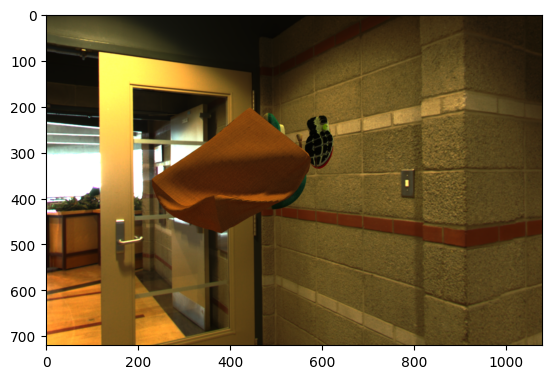

In [2]:
img_path_txt = '/mnt/3d_object_detection/parcel3d/parcel3D_train.txt'
# base_img_path 하위의 임의의 이미지 선택

def get_image_files(path):
    img_files = []
    with open(img_path_txt, 'r') as f:
        lines = f.readlines()
        for line in lines:
            img_file = line.strip()
            img_files.append(img_file)
    return img_files

img_files = get_image_files(img_path_txt)
print("총 이미지 개수 : ", len(img_files))
random_img_path = random.choice(img_files)
# random_img_path = '/mnt/3d_object_detection/parcel3d/train/bd1f0e59-b754-b384-601a-3c9dc6a559f1/bd1f0e59-b754-b384-601a-3c9dc6a559f1.png'

img = Image.open(random_img_path)

# 이미지 표시
plt.imshow(img)
# 이미지 크기 출력
print(f'이미지 크기: {img.size}')


In [3]:
# 선택한 이미지에 해당하는 라벨 파일 찾기
label_path = random_img_path.replace('png', 'json')

# 라벨 파일에서 bounding box 정보 읽기
with open(label_path, 'r') as f:
    anns = json.load(f)
    ann = anns["labelingInfo"][0]["3DBox"]
    xy_dict = ann["location"][0]
    corner_order = [9,8,4,5,1,7,3,6,2]
    label = [[int(xy_dict[f"x{i}"]), int(xy_dict[f"y{i}"])] for i in corner_order]  
    dimension = ann["dimension"]
    pts_ori = np.array(label)

print(pts_ori)

[[415 349]
 [446 254]
 [252 400]
 [445 203]
 [235 353]
 [568 346]
 [379 517]
 [577 298]
 [372 477]]


In [4]:
def add_coco_hp( points, img, pred_flag='pred', PAPER_DISPLAY=False):
        colors_hp = [(0, 0, 255), (0, 165, 255), (0, 255, 255),
                          (0, 128, 0), (255, 0, 0), (130, 0, 75), (238, 130, 238),
                          (0, 0, 0), (255, 0, 0), (255, 0, 0), (255, 0, 0)]
        num_joints = 8
        # objectron version
        edges = [[2, 4], [2, 6], [6, 8], [4, 8],
                      [1, 2], [3, 4], [5, 6], [7, 8],
                      [1, 3], [1, 5], [3, 7], [5, 7]]
        
        points = np.array(points, dtype=np.int32).reshape(num_joints, 2)

        # Draw corner points
        for j in range(num_joints):
            cv2.circle(img,
                        (points[j, 0], points[j, 1]), 5, colors_hp[j], -1)
            cv2.putText(img, str(j+1), (points[j, 0], points[j, 1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        

        # Draw edges
        for j, e in enumerate(edges):
            temp = [e[0] - 1, e[1] - 1]
            # temp = [e[0], e[1]]

            if pred_flag == 'pred':
                edge_color = (0, 0, 255)  # bgr
            elif pred_flag == 'gt':
                edge_color = (0, 255, 0)
            elif pred_flag == 'pnp':
                edge_color = (0, 0, 255)  # bgr
            elif pred_flag == 'extra':
                edge_color = (0, 165, 255)
            if points[temp[1], 0] <= -10000 or points[temp[1], 1] <= -10000 or points[temp[0], 0] <= -10000 or \
                    points[temp[0], 1] <= -10000:
                continue
            else:
                cv2.line(img, (points[temp[0], 0], points[temp[0], 1]),
                         (points[temp[1], 0], points[temp[1], 1]), edge_color, 2)

        if pred_flag == 'pred':
            edge_color = (0, 0, 255)
        elif pred_flag == 'gt':
            edge_color = (255, 255, 255)
        elif pred_flag == 'pnp':
            edge_color = (0, 0, 0)

<class 'numpy.ndarray'>
(720, 1080, 3)
[0.544, 0.2391, 0.8084]


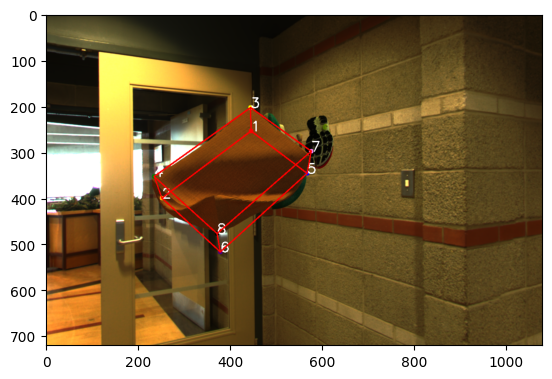

In [6]:
img = cv2.imread(random_img_path)
add_coco_hp(pts_ori[1:], img)
print(type(img))
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(dimension)
plt.show()

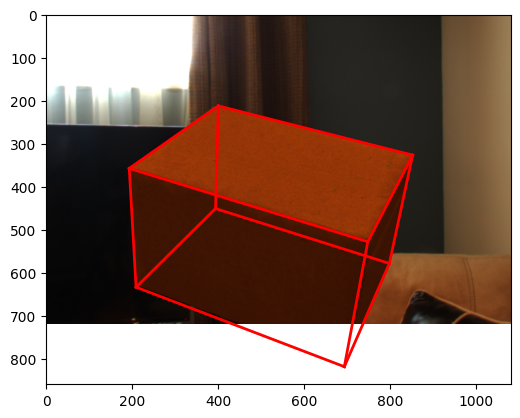

In [16]:

# 8개의 키포인트에 맞게 정육면체 바운딩박스 그리기
image_width, image_height = img.size
keypoints = bbox_coords  # bbox_coords는 8개의 키포인트 좌표를 포함하고 있음

# 각 키포인트의 x, y 좌표를 이미지 크기에 맞게 변환
points = [(keypoints[i] * image_width, keypoints[i + 1] * image_height) for i in range(0, len(keypoints), 2)]

# 정육면체의 각 변을 그리기
plt.imshow(img)
# 키포인트 순서 수정: 0, 1, 2, 3 (바닥면), 4, 5, 6, 7 (윗면)
# Draw lines
edges_corners = [
    [0, 2], [2, 1], [1, 3], [3, 0],  # Lower rectangle (front)
    [4, 6], [6, 5], [5, 7], [7, 4],  # Upper rectangle (back)
    [2, 6], [0, 4], [3, 7], [1, 5]   # Edges connecting lower and upper rectangles
]

for i, edge in enumerate(edges_corners):
    plt.plot([points[edge[0]][0], points[edge[1]][0]], 
             [points[edge[0]][1], points[edge[1]][1]], color='red', linewidth=2)

plt.show()


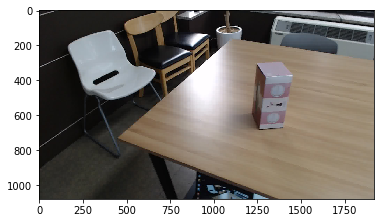

이미지 크기: (1920, 1080)


In [ ]:
base_img_path = '/data/yolo3d/YOLO3D/3dhub/MISO/Flex3D-bbox/dataset/box/Images/'
# base_img_path 하위의 임의의 이미지 선택
import random

def get_image_files(path):
    img_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg') and file != 'texture.png' and file != '00_mask.png':
                img_files.append(os.path.join(root, file))
    return img_files

img_files = get_image_files(base_img_path)
random_img = random.choice(img_files)

img_path = os.path.join(base_img_path, random_img)
img = Image.open(img_path)

# 이미지 표시
plt.imshow(img)
# plt.title(f'선택된 이미지: {random_img}')
plt.show()

# 이미지 크기 출력
print(f'이미지 크기: {img.size}')


In [ ]:
base_label_path = '/data/yolo3d/YOLO3D/3dhub/MISO/Flex3D-bbox/baseline/data/box/labels/'

label_files = []

for filename in os.listdir(base_label_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(base_label_path, filename)
        label_files.append(filename)

In [ ]:
print(random_img)
# 선택한 이미지에 해당하는 라벨 파일 찾기
label_file_name = os.path.splitext(os.path.basename(random_img))[0] + '.txt'
label_file_path = os.path.join(base_label_path, label_file_name)

# 라벨 파일에서 bounding box 정보 읽기
with open(label_file_path, 'r') as f:
    label_data = f.readline().strip().split()[1:]  # 첫 번째 값은 클래스 ID이므로 제외
    bbox_coords = list(map(float, label_data))  # 문자열을 float로 변환


/data/yolo3d/YOLO3D/3dhub/MISO/Flex3D-bbox/dataset/box/Images/box_tissue_2_0011.jpg


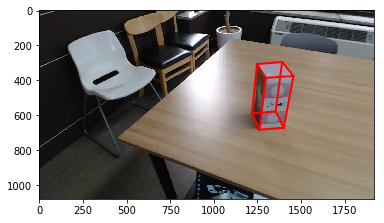

In [ ]:
# 8개의 키포인트에 맞게 정육면체 바운딩박스 그리기
image_width, image_height = img.size
keypoints = bbox_coords  # bbox_coords는 8개의 키포인트 좌표를 포함하고 있음

# 각 키포인트의 x, y 좌표를 이미지 크기에 맞게 변환
points = [(keypoints[i] * image_width, keypoints[i + 1] * image_height) for i in range(0, len(keypoints), 2)]

# 정육면체의 각 변을 그리기
plt.imshow(img)
# 키포인트 순서 수정: 0, 1, 2, 3 (바닥면), 4, 5, 6, 7 (윗면)
# Draw lines
edges_corners = [
    [0, 2], [2, 1], [1, 3], [3, 0],  # Lower rectangle (front)
    [4, 6], [6, 5], [5, 7], [7, 4],  # Upper rectangle (back)
    [2, 6], [0, 4], [3, 7], [1, 5]   # Edges connecting lower and upper rectangles
]

for i, edge in enumerate(edges_corners):
    plt.plot([points[edge[0]][0], points[edge[1]][0]], 
             [points[edge[0]][1], points[edge[1]][1]], color='red', linewidth=2)

plt.show()
